In [1]:
import subprocess
from Bio import SeqIO
from Bio.PDB import PDBParser, PPBuilder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:

def extract_chains_and_sequence(pdb_file):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("protein", pdb_file)
    chains = {}
    for model in structure:  # Iterate over models (usually only one)
        for chain in model:  # Iterate over chains
            chain_id = chain.id
            sequence = ""
            for residue in chain:
                # Skip non-standard residues
                if residue.id[0] == " ":
                    sequence += residue.resname[0]  # Get the first letter of the 3-letter residue code
            chains[chain_id] = sequence

    return chains

pdb_file = "/home/labs/rudich/meiray/meirab/foldx/1BOD.pdb"
# sequence = extract_sequence_from_pdb(pdb_file)
chains = extract_chains_and_sequence(pdb_file)

for chain_id, sequence in chains.items():
    print(f"Chain {chain_id}: {sequence}")


Chain A: GLLGIPGLTALGGAGGLSLGGLLLLLGTGPPSLLLGMSTLAGLPGGLALAGAGGVSPGGPGVLVLLIS


In [3]:
chain_id

'A'

In [ ]:
mutatex "/home/labs/rudich/meiray/meirab/foldx/1BOD.pdb" -m mutation_list.txt -f suite5 -R repair_runfile_template.txt -M mutate_runfile_template.txt -I interface_runfile_template.txt

In [55]:
sequence = 'VTLVAdLTATGAATGAALSPHLGGLPGILASSGGATTGAASLTTGGTGTIPSATVAPV'

In [4]:
chain = "A"  # The chain identifier for the PDB file
mutants = "ACDEFGHIKLMNPQRSTVWY"  # All possible mutations (excluding the wild type)

# Create the individual_list.txt file
with open("individual_list.txt", "w") as f:
    for residue_number, wt_residue in enumerate(sequence, start=1):
        for mutant_residue in mutants:
            if wt_residue != mutant_residue:  # Exclude wild-type residue as mutant
                f.write(f"{wt_residue}{chain}{residue_number}{mutant_residue};\n")

print("individual_list.txt file created successfully!")


individual_list.txt file created successfully!


In [37]:
file_path = "/home/labs/rudich/meiray/meirab/foldx/Dif_1A0N.fxout"

In [39]:
df = pd.read_csv(file_path, sep="\t", skiprows=8)  # Adjust skiprows as needed



In [40]:
df

,Pdb,total energy,Backbone Hbond,Sidechain Hbond,Van der Waals,Electrostatics,Solvation Polar,Solvation Hydrophobic,Van der Waals clashes,entropy sidechain,...,cis_bond,torsional clash,backbone clash,helix dipole,water bridge,disulfide,electrostatic kon,partial covalent bonds,energy Ionisation,Entropy Complex
0,1A0N_1.pdb,0.199687,0.000000,0.000000,0.419257,0.000000,-0.364286,0.648424,-0.027329,-0.359869,...,0,-0.073872,0.000000,0,0,0,0,0,0,0
1,1A0N_2.pdb,0.495335,0.015464,0.000000,0.154315,0.000000,-0.220271,0.167349,-0.005458,-0.063147,...,0,0.000000,0.000000,0,0,0,0,0,0,0
2,1A0N_3.pdb,2.070700,0.172148,0.008383,1.278680,0.005823,-0.718566,2.449740,-0.000476,-1.196330,...,0,-0.038280,-0.014437,0,0,0,0,0,0,0


In [43]:

def plot_energy_heatmap(df_energy):
    # Extract PDB filenames and total energy values
    pdb_files = df_energy['Pdb']
    total_energy = df_energy['total energy']
    
    # Reshape the data into a format suitable for a heatmap (this is essentially a 1D heatmap)
    data = total_energy.values.reshape(1, -1)  # Reshape to a 1xN array
    
    # Plot heatmap
    plt.figure(figsize=(12, 2))  # Adjust the size based on the number of mutations/PDB files
    sns.heatmap(data, xticklabels=pdb_files, yticklabels=["Total Energy"], cmap="coolwarm", annot=True, cbar_kws={'label': 'Energy (kcal/mol)'})
    
    # Add titles and labels
    plt.title("Heatmap of Total Energy for Mutations")
    plt.xlabel("PDB Files")
    plt.ylabel("Energy")
    plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
    plt.show()



          Pdb  total energy
0  1A0N_1.pdb      0.199687
1  1A0N_2.pdb      0.495335
2  1A0N_3.pdb      2.070700


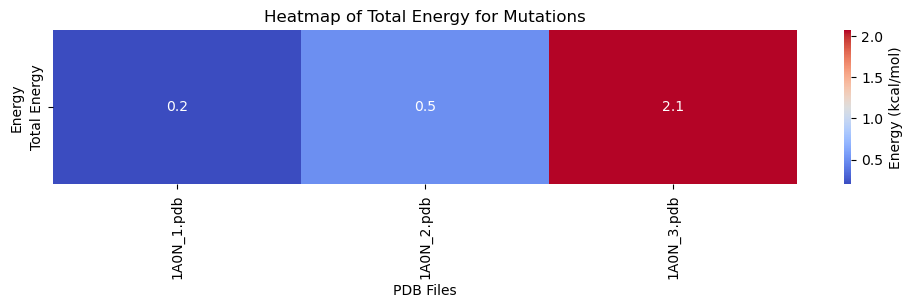

In [44]:
def extract_energy_diff(file_path):
    df = pd.read_csv(file_path, sep="\t" , skiprows=8, usecols=["Pdb", "total energy"])
    print(df.head())
    return df

# Example usage
file_path = "/home/labs/rudich/meiray/meirab/foldx/Dif_1A0N.fxout"
df_energy = extract_energy_diff(file_path)
plot_energy_heatmap(df_energy)  # Continue with the plotting function


In [6]:
import subprocess

# Full paths to FoldX, PDB file, and mutation file
foldx_path = "/home/labs/rudich/meiray/meirab/foldx/foldx_20241231"
mutation_file = "/home/labs/rudich/meiray/meirab/foldx/individual_list.txt"

# Run FoldX command
command = [
    foldx_path,
    "--command=BuildModel",
    f"--pdb={pdb_file}",
    f"--mutant-file={mutation_file}"
]

try:
    # Execute the command
    subprocess.run(command, check=True)
    print("FoldX has completed the mutation calculations.")
except subprocess.CalledProcessError as e:
    print(f"Error occurred while running FoldX: {e}")


   ********************************************
   ***                                      ***
   ***             FoldX 4 (c)              ***
   ***                                      ***
   ***     code by the FoldX Consortium     ***
   ***                                      ***
   ***     Jesper Borg, Frederic Rousseau   ***
   ***    Joost Schymkowitz, Luis Serrano   ***
   ***    Peter Vanhee, Erik Verschueren    ***
   ***     Lies Baeten, Javier Delgado      ***
   ***       and Francois Stricher          ***
   *** and any other of the 9! permutations ***
   ***   based on an original concept by    ***
   ***   Raphael Guerois and Luis Serrano   ***
   ********************************************

No pdbs for the run found at:
"./"
Foldx will end
Error occurred while running FoldX: Command '['/home/labs/rudich/meiray/meirab/foldx/foldx_20241231', '--command=BuildModel', '--pdb=/home/labs/rudich/meiray/meirab/foldx/1BOD.pdb', '--mutant-file=/home/labs/rudich/meiray/meirab/

In [ ]:
import os
import subprocess
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Paths
foldx_path = "/home/labs/rudich/meiray/meirab/foldx"  # Path where your PDB files are
output_dir = "/home/labs/rudich/meiray/meirab/foldx_results"  # Output directory for results
foldx_executable = "/home/labs/rudich/meiray/meirab/foldx/foldx_20241231"  # Path to the FoldX executable
os.makedirs(output_dir, exist_ok=True)

def calculate_mutation_stability(pdb_file, foldx_executable, output_folder):
    print(f"Using PDB file: {os.path.abspath(pdb_file)}")

    stability_scores = {}
    for i in range(1, 907):  # Assuming 906 residues
        for aa in "ACDEFGHIKLMNPQRSTVWY":
            mutation = f"A{i}{aa}"
            repair_command = [
                foldx_executable,
                "--command=RepairPDB",
                "--pdb={}".format(os.path.abspath(pdb_file)),  # Use absolute path
                "--output-dir={}".format(output_folder)
            ]

            build_model_command = [
                foldx_executable,
                "--command=BuildModel",
                "--pdb={}".format(os.path.basename(pdb_file)),
                "--mutant-file=individual_list.txt",
                "--output-dir={}".format(output_folder)
            ]
            
            # Prepare mutation file
            mutant_file = os.path.join(output_folder, "individual_list.txt")
            with open(mutant_file, "w") as f:
                f.write(mutation + "\n")
            
            # Print the command to check it
            print(f"Running repair command: {' '.join(repair_command)}")
            repair_result = subprocess.run(repair_command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            if repair_result.stderr:
                print(f"Error in RepairPDB command: {repair_result.stderr.decode()}")
            else:
                print(f"RepairPDB command output: {repair_result.stdout.decode()}")

            print(f"Running build model command: {' '.join(build_model_command)}")
            build_result = subprocess.run(build_model_command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            if build_result.stderr:
                print(f"Error in BuildModel command: {build_result.stderr.decode()}")
            else:
                print(f"BuildModel command output: {build_result.stdout.decode()}")
            
            # Check if result file is generated
            result_file = os.path.join(output_folder, f"{os.path.basename(pdb_file).replace('.pdb', '')}_0.txt")
            print(f"Checking for result file: {result_file}")
            if os.path.exists(result_file):
                try:
                    with open(result_file, "r") as f:
                        score = float(f.readlines()[-1].split("\t")[1])  # Stability score
                        stability_scores[mutation] = score
                except Exception as e:
                    print(f"Error parsing result for {mutation}: {e}")
                    stability_scores[mutation] = None
            else:
                print(f"Result file not found for mutation {mutation}")
                stability_scores[mutation] = None
    
    return stability_scores


# Step 3: Process stability scores into a DataFrame
def process_scores_to_dataframe(stability_scores):
    data = []
    for mutation, score in stability_scores.items():
        chain, position, mutant = mutation[0], int(mutation[1:-1]), mutation[-1]
        data.append((chain, position, mutant, score))
    df = pd.DataFrame(data, columns=["Chain", "Position", "Mutant", "Stability"])
    return df


# Step 4: Generate heatmap
def generate_heatmap(df, output_html):
    pivot = df.pivot("Position", "Mutant", "Stability")
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot, cmap="coolwarm", annot=False)
    plt.title("Stability Heatmap per Mutation")
    plt.xlabel("Mutant")
    plt.ylabel("Position")
    heatmap_path = output_html.replace(".html", ".png")
    plt.savefig(heatmap_path)
    plt.close()

    # Save as interactive HTML heatmap
    fig = px.imshow(
        pivot,
        labels=dict(x="Mutant", y="Position", color="Stability"),
        x=pivot.columns,
        y=pivot.index,
        color_continuous_scale="coolwarm"
    )
    fig.write_html(output_html)


# Main Execution
if __name__ == "__main__":
    print("Running FoldX mutation calculations...")
    # Loop through each pdb file and calculate mutation stability
    for pdb_file in os.listdir(foldx_path):
        if pdb_file.endswith(".pdb"):
            pdb_file_in_foldx = os.path.join(foldx_path, pdb_file)
            stability_scores = calculate_mutation_stability(pdb_file_in_foldx, foldx_executable, output_dir)
            print(f"Processing scores for {pdb_file} into a DataFrame...")
            df_scores = process_scores_to_dataframe(stability_scores)

            print(f"Generating heatmap for {pdb_file}...")
            heatmap_output = os.path.join(output_dir, f"stability_heatmap_{os.path.splitext(pdb_file)[0]}.html")
            generate_heatmap(df_scores, heatmap_output)

    print(f"Pipeline complete. Heatmaps saved to {output_dir}")


In [16]:
from Bio.PDB import PDBParser, PPBuilder

def extract_sequence_from_pdb(pdb_file):
    parser = PDBParser(QUIET=True)  # QUIET=True to suppress warnings
    structure = parser.get_structure("protein", pdb_file)

    # Use the Polypeptide builder to get the sequence
    ppb = PPBuilder()
    sequence = ""
    for pp in ppb.build_peptides(structure):
        sequence += pp.get_sequence()

    return str(sequence)

pdb_file = "/home/labs/rudich/meiray/meirab/foldx/1A32.pdb"
sequence = extract_sequence_from_pdb(pdb_file)
print(f"Extracted sequence: {sequence}")


Extracted sequence: SPEVQIAILTEQINNLNEHLRVHKKDHHSRRGLLKMVGKRRRLLAYLRNKDVARYREIVEKLG


In [20]:
from Bio.PDB.PDBParser import PDBParser
from Bio.PDB.Polypeptide import three_to_one

def extract_sequence_from_pdb_atom_records(pdb_file):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("protein", pdb_file)

    sequence = []
    seen_residues = set()

    for model in structure:
        for chain in model:
            for residue in chain:
                # Skip non-standard residues
                if residue.id[0] != " ":
                    continue

                # Extract residue name
                resname = residue.resname

                # Convert to one-letter code
                try:
                    one_letter = three_to_one(resname)
                except KeyError:
                    # Skip unknown residues
                    continue

                # Avoid duplicates (e.g., multiple atoms of the same residue)
                if residue.id not in seen_residues:
                    sequence.append(one_letter)
                    seen_residues.add(residue.id)

    return "".join(sequence)

pdb_file = "/home/labs/rudich/meiray/meirab/foldx/1AOY.pdb"
sequence = extract_sequence_from_pdb_atom_records(pdb_file)
print(f"Extracted sequence: {sequence}")


Extracted sequence: QEELVKAFKALLKEEKFSSQGEIVAALQEQGFDNINQSKVSRMLTKFGAVRTRNAKMEMVYCLPAELGV


In [13]:
import os

desired_dir = "/home/labs/rudich/meiray/meirab/foldx/"
os.chdir(desired_dir)
print(f"Changed working directory to: {os.getcwd()}")


Changed working directory to: /home/labs/rudich/meiray/meirab/foldx


In [ ]:
meirab/foldx/foldx_20241231

In [1]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [8]:
def calculate_mutation_stability(pdb_file, foldx_executable, output_folder):
    stability_scores = {}
    for i in range(1, 907):  # Assuming 906 residues
        for aa in "ACDEFGHIKLMNPQRSTVWY":
            mutation = f"A{i}{aa}"
            repair_command = [
                foldx_executable,
                "--command=RepairPDB",
                "--pdb={}".format(pdb_file),
                "--output-dir={}".format(output_folder)
            ]
            build_model_command = [
                foldx_executable,
                "--command=BuildModel",
                "--pdb={}".format(os.path.basename(pdb_file)),
                "--mutant-file=individual_list.txt",
                "--output-dir={}".format(output_folder)
            ]
            
            # Prepare mutation file
            mutant_file = os.path.join(output_folder, "individual_list.txt")
            with open(mutant_file, "w") as f:
                f.write(mutation + "\n")
            
            # Print the command to check it
            print(f"Running repair command: {' '.join(repair_command)}")
            repair_result = subprocess.run(repair_command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            if repair_result.stderr:
                print(f"Error in RepairPDB command: {repair_result.stderr.decode()}")
            else:
                print(f"RepairPDB command output: {repair_result.stdout.decode()}")

            print(f"Running build model command: {' '.join(build_model_command)}")
            build_result = subprocess.run(build_model_command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            if build_result.stderr:
                print(f"Error in BuildModel command: {build_result.stderr.decode()}")
            else:
                print(f"BuildModel command output: {build_result.stdout.decode()}")
            
            # Check if result file is generated
            result_file = os.path.join(output_folder, f"{os.path.basename(pdb_file).replace('.pdb', '')}_0.txt")
            print(f"Checking for result file: {result_file}")
            if os.path.exists(result_file):
                try:
                    with open(result_file, "r") as f:
                        score = float(f.readlines()[-1].split("\t")[1])  # Stability score
                        stability_scores[mutation] = score
                except Exception as e:
                    print(f"Error parsing result for {mutation}: {e}")
                    stability_scores[mutation] = None
            else:
                print(f"Result file not found for mutation {mutation}")
                stability_scores[mutation] = None
    
    return stability_scores


In [7]:
result = subprocess.run(repair_command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print("RepairPDB output:", result.stdout.decode())
print("RepairPDB error:", result.stderr.decode())

result = subprocess.run(build_model_command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print("BuildModel output:", result.stdout.decode())
print("BuildModel error:", result.stderr.decode())


NameError: name 'repair_command' is not defined

In [12]:
print(f"Current working directory: {os.getcwd()}")


Current working directory: /home/labs/rudich/meiray/meirab/mega_exp/AlphaFold_model_PDBs


In [22]:
FoldX --command=PDBFile --pdb=PF.pdb

SyntaxError: cannot assign to expression (2668601028.py, line 1)

Sequence extracted: QEELVKAFKALLKEEKFSSQGEIVAALQEQGFDNINQSKVSRMLTKFGAVRTRNAKMEMVYCLPAELGV
Result file not found for mutation A1A
Result file not found for mutation A1C
Result file not found for mutation A1D
Result file not found for mutation A1E
Result file not found for mutation A1F
Result file not found for mutation A1G
Result file not found for mutation A1H
Result file not found for mutation A1I
Result file not found for mutation A1K
Result file not found for mutation A1L
Result file not found for mutation A1M
Result file not found for mutation A1N
Result file not found for mutation A1P
Result file not found for mutation A1R
Result file not found for mutation A1S
Result file not found for mutation A1T
Result file not found for mutation A1V
Result file not found for mutation A1W
Result file not found for mutation A1Y
Result file not found for mutation A2A
Result file not found for mutation A2C
Result file not found for mutation A2D
Result file not found for mutation A2F
Result file n

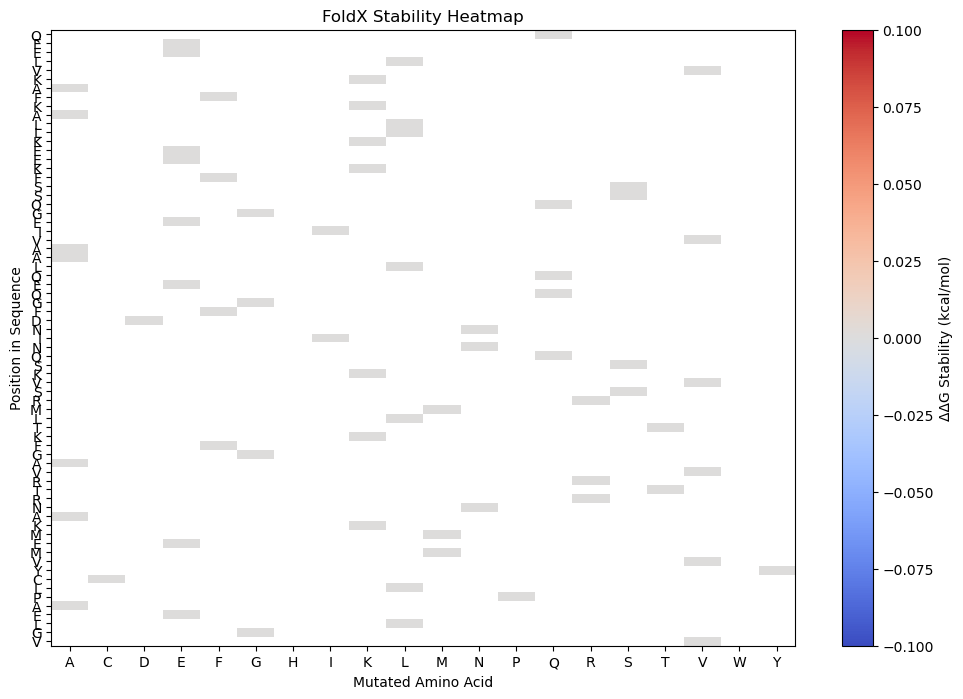

In [21]:
import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from Bio.PDB.Polypeptide import three_to_one

def calculate_foldx_heatmap(pdb_file, foldx_executable, output_folder):
    # Step 1: Extract sequence
    sequence = extract_sequence_from_pdb_atom_records(pdb_file)
    print(f"Sequence extracted: {sequence}")

    # Step 2: Prepare output folder
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Step 3: Repair the PDB file
    repair_command = [
        foldx_executable,
        "--command=RepairPDB",
        "--pdb={}".format(pdb_file),
        "--output-dir={}".format(output_folder)
    ]
    subprocess.run(repair_command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    # Step 4: Create mutation list and calculate stability
    stability_matrix = np.zeros((len(sequence), 20))  # len(sequence) x 20 amino acids

    amino_acids = "ACDEFGHIKLMNPQRSTVWY"
    for i, original_aa in enumerate(sequence):
        for j, mutated_aa in enumerate(amino_acids):
            if original_aa == mutated_aa:  # Skip if no mutation
                stability_matrix[i, j] = 0  # No change in ΔΔG
                continue

            mutation = f"A{i+1}{mutated_aa}"  # Mutation format (e.g., A1C)
            mutant_file = os.path.join(output_folder, "individual_list.txt")
            
            # Write mutation file
            with open(mutant_file, "w") as f:
                f.write(mutation + "\n")

            # BuildModel command
            build_model_command = [
                foldx_executable,
                "--command=BuildModel",
                "--pdb={}".format(os.path.basename(pdb_file).replace(".pdb", "_Repair.pdb")),
                "--mutant-file={}".format(mutant_file),
                "--output-dir={}".format(output_folder)
            ]
            subprocess.run(build_model_command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

            # Parse the result
            result_file = os.path.join(output_folder, f"{os.path.basename(pdb_file).replace('.pdb', '_Repair')}_0.txt")
            if os.path.exists(result_file):
                try:
                    with open(result_file, "r") as f:
                        score = float(f.readlines()[-1].split("\t")[1])  # ΔΔG score
                        stability_matrix[i, j] = score
                except Exception as e:
                    print(f"Error parsing result for {mutation}: {e}")
                    stability_matrix[i, j] = np.nan
            else:
                print(f"Result file not found for mutation {mutation}")
                stability_matrix[i, j] = np.nan

    return stability_matrix, sequence, amino_acids

# Step 5: Plot Heatmap
def plot_heatmap(stability_matrix, sequence, amino_acids, output_file=None):
    plt.figure(figsize=(12, 8))
    plt.imshow(stability_matrix, cmap="coolwarm", aspect="auto", interpolation="nearest")
    plt.colorbar(label="ΔΔG Stability (kcal/mol)")
    plt.xticks(ticks=np.arange(len(amino_acids)), labels=list(amino_acids))
    plt.yticks(ticks=np.arange(len(sequence)), labels=list(sequence))
    plt.xlabel("Mutated Amino Acid")
    plt.ylabel("Position in Sequence")
    plt.title("FoldX Stability Heatmap")
    if output_file:
        plt.savefig(output_file, dpi=300)
    plt.show()

# Example Usage
pdb_file = "/home/labs/rudich/meiray/meirab/foldx/1AOY.pdb"
foldx_executable = "/home/labs/rudich/meiray/meirab/foldx/foldx_20241231"
output_folder = "/home/labs/rudich/meiray/meirab/foldx_results"

stability_matrix, sequence, amino_acids = calculate_foldx_heatmap(pdb_file, foldx_executable, output_folder)
plot_heatmap(stability_matrix, sequence, amino_acids, output_file="stability_heatmap.png")
